# Correlation plots

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.0.2
0.9.0


# Scatter

## Scatter with groupings

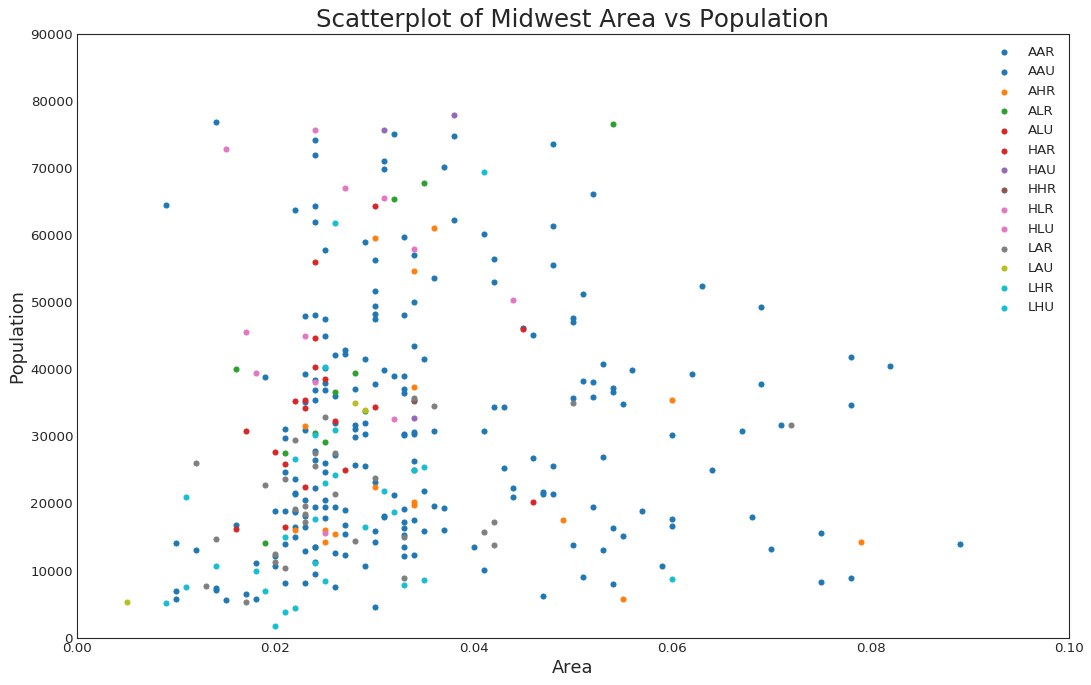

In [2]:
# Import dataset 
midwest = pd.read_csv("data/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=[colors[i]], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

In [3]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

In [4]:
range(len(categories))

range(0, 14)

In [5]:
categories

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

## Bubble plot with encircling

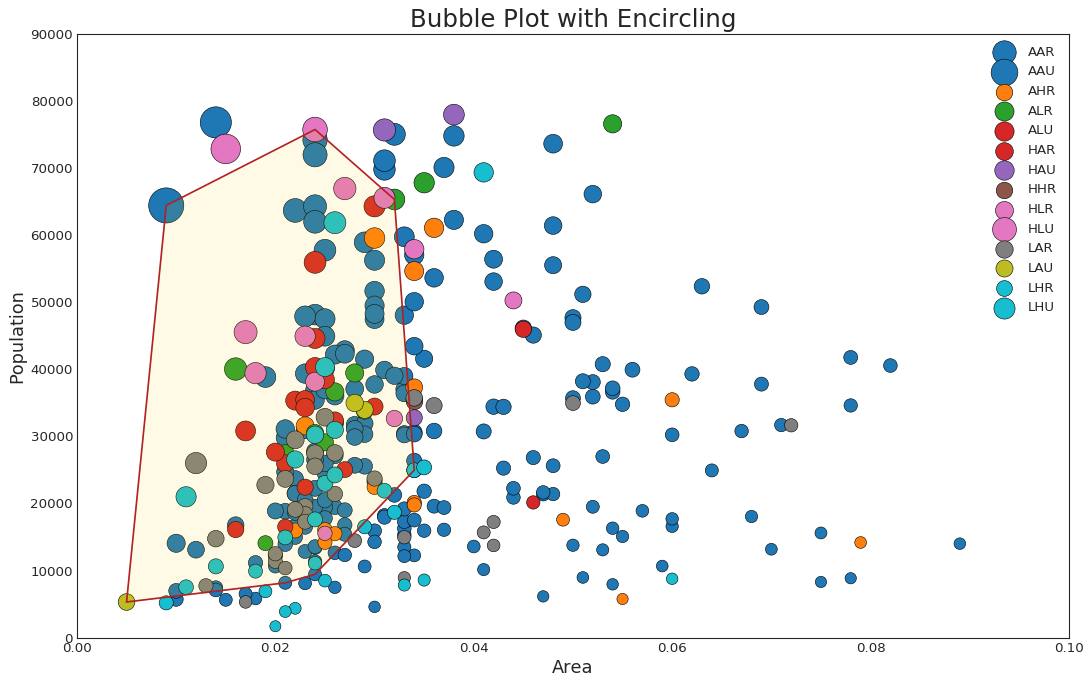

In [11]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("data/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=[colors[i]], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

## Line of best fit on scatter plot

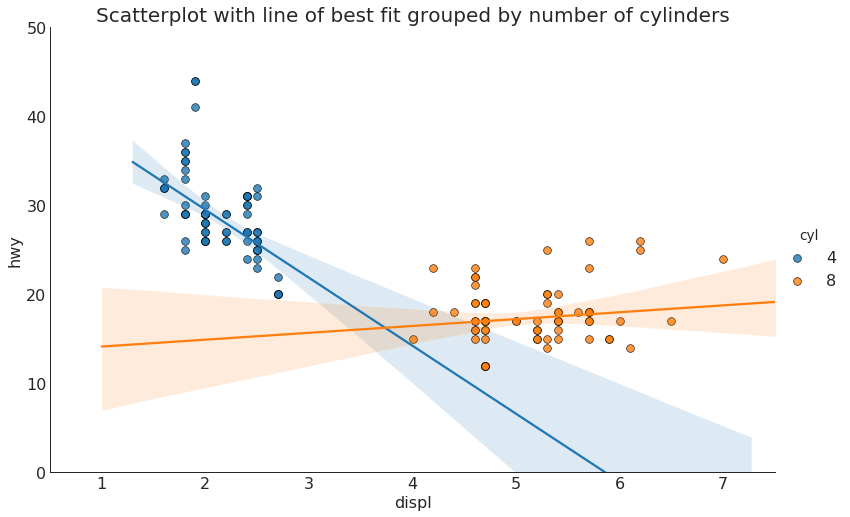

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [23]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()
df.head()

In [24]:
df.cyl.isin([4,8])

0       True
1       True
2       True
3       True
4      False
5      False
6      False
7       True
8       True
9       True
10      True
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
204    False
205    False
206    False
207     True
208     True
209     True
210     True
211    False
212     True
213     True
214     True
215     True
216     True
217    False
218    False
219    False
220    False
221     True
222     True
223     True
224     True
225    False
226    False
227     True
228     True
229     True
230     True
231    False
232    False
233    False
Name: cyl, Length: 234, dtype: bool

## Separate 

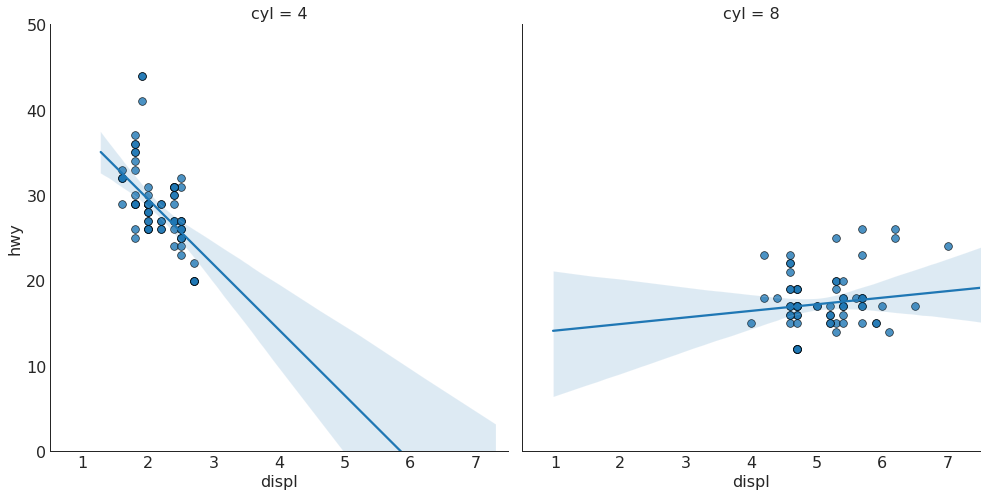

In [9]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

## Scatter with jittering

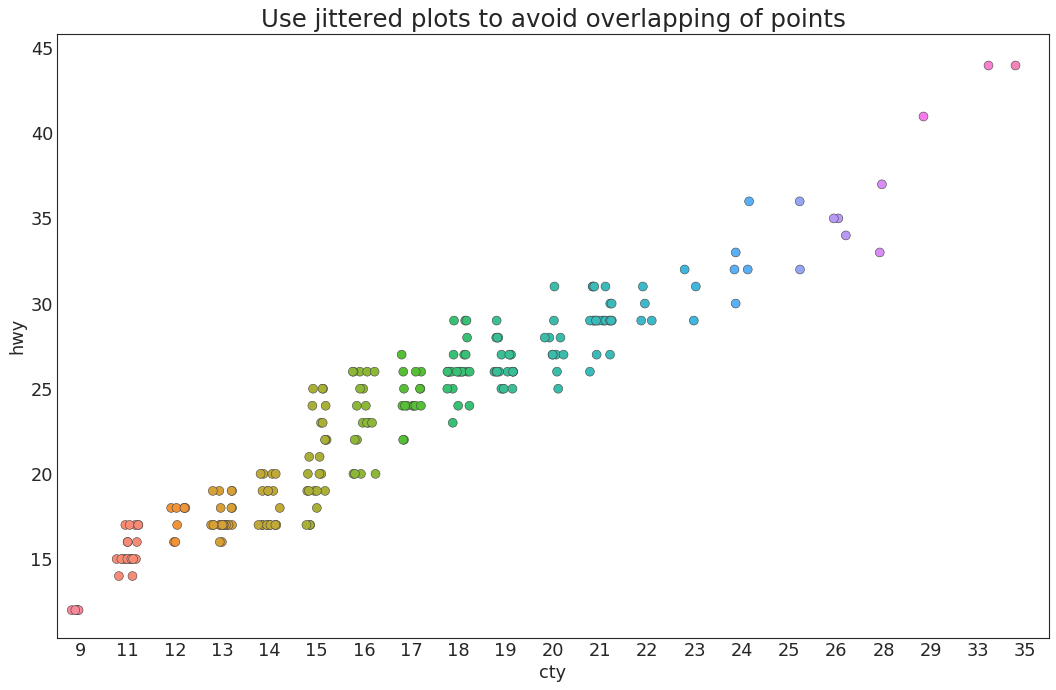

In [10]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

## Coffee plotting

In [33]:
df = pd.read_csv("data/coffee.csv")
df_select = df.loc[df['Species'].isin(["Arabica"]), :]
df_select.head(2)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,2016-04-03 0:00:00,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,2016-04-03 0:00:00,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [35]:
df = df[pd.notnull(df['Flavor'])]
df = df[pd.notnull(df['Aroma'])]
df = df[pd.notnull(df['Body'])]

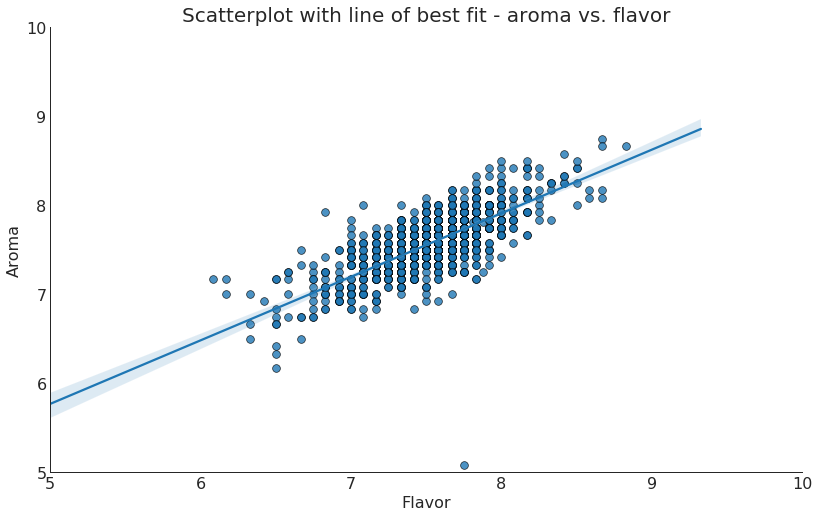

In [40]:
# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Flavor", y="Aroma", data=df, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(5, 10), ylim=(5, 10))
plt.title("Scatterplot with line of best fit - aroma vs. flavor", fontsize=20)
plt.show()

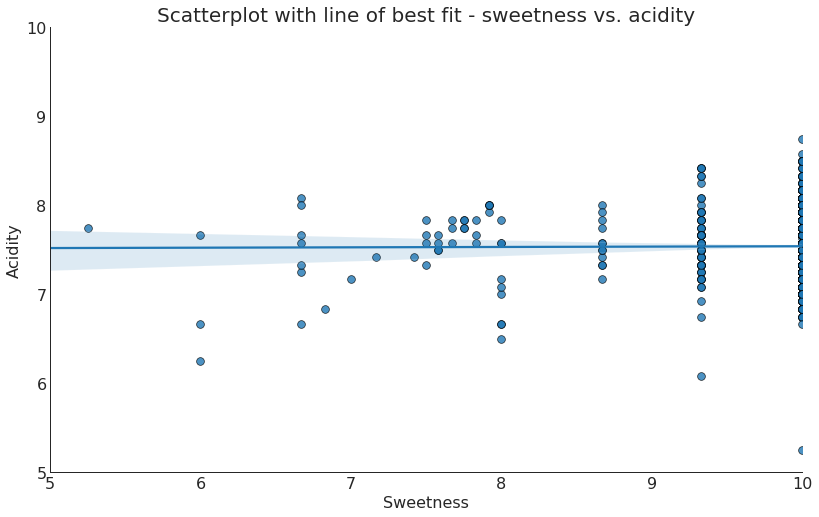

In [42]:
# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Sweetness", y="Acidity", data=df, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(5, 10), ylim=(5, 10))
plt.title("Scatterplot with line of best fit - sweetness vs. acidity", fontsize=20)
plt.show()

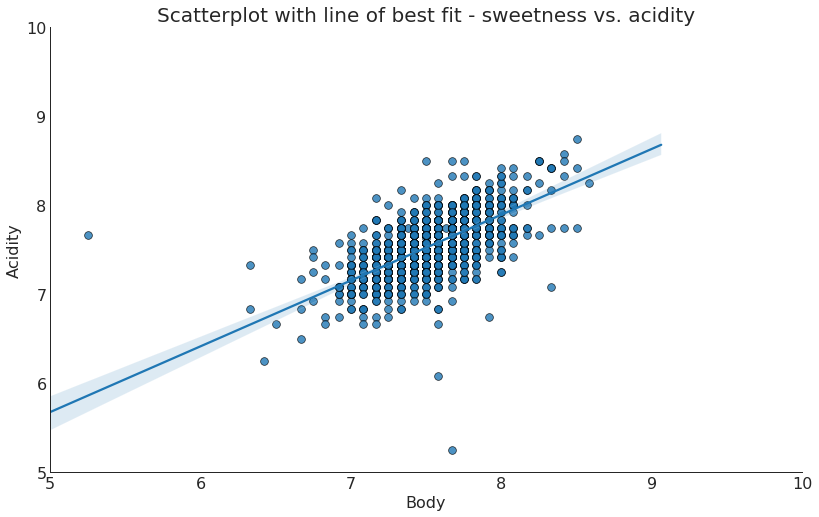

In [43]:
gridobj = sns.lmplot(x="Body", y="Acidity", data=df, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(5, 10), ylim=(5, 10))
plt.title("Scatterplot with line of best fit - body vs. acidity", fontsize=20)
plt.show()

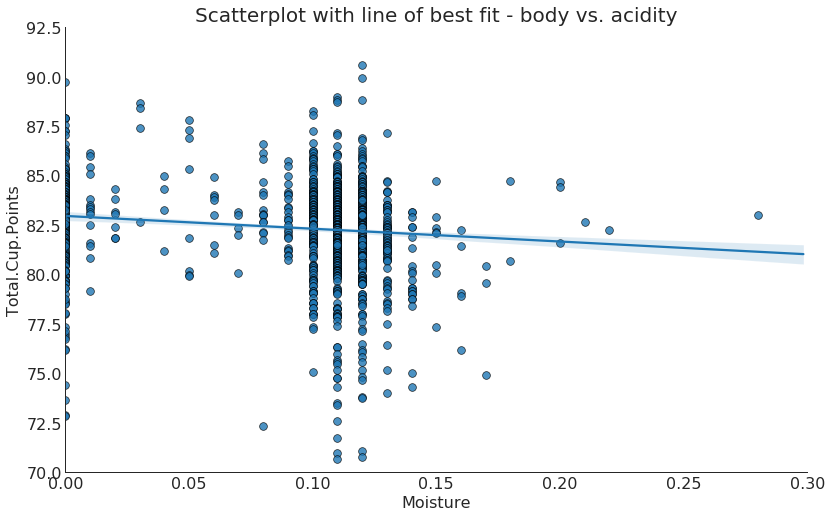

In [46]:
gridobj = sns.lmplot(x="Moisture", y="Total.Cup.Points", data=df, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0, 0.3), ylim=(70, 92.5))
plt.title("Scatterplot with line of best fit - body vs. acidity", fontsize=20)
plt.show()